In [1]:
import numpy as np
import pandas as pd
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Conv2D,MaxPool2D,Flatten
import PIL
from PIL import Image
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator,load_img

Using TensorFlow backend.


In [2]:
train_normal=r"C:\Users\admin\Downloads\pheumonia\chest_xray\train\NORMAL"
train_pneu=r"C:\Users\admin\Downloads\pheumonia\chest_xray\train\PNEUMONIA"

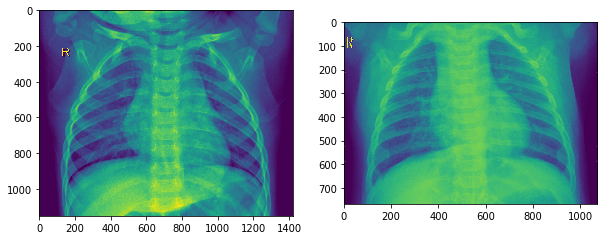

In [3]:
#just random check and comparing the image
a=Image.open(train_normal+'\\'+os.listdir(train_normal)[1])
b=Image.open(train_pneu+'\\'+os.listdir(train_pneu)[1])
f=plt.figure(figsize=(10,6))
f.add_subplot(1,2,1)
plt.imshow(a)
f.add_subplot(1,2,2)
plt.imshow(b)
plt.show()

In [4]:
train_datagen=ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1/255)

In [5]:
train_set=train_datagen.flow_from_directory(r"C:\Users\admin\Downloads\pheumonia\chest_xray\train",target_size=(64, 64),
    batch_size=32,
    class_mode='binary')
test_set=test_datagen.flow_from_directory(r"C:\Users\admin\Downloads\pheumonia\chest_xray\test",target_size=(64, 64),
    batch_size=32,
    class_mode='binary')
val_set=test_datagen.flow_from_directory(r"C:\Users\admin\Downloads\pheumonia\chest_xray\val",target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [6]:
#model_building
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])

Basic model we can add many layers and may filters to it to increase the accuracy.

In [7]:
history=model.fit_generator(train_set,validation_data=val_set,epochs=10)

Epoch 1/10
163/163 [==============================] - 134s 824ms/step - loss: 0.3422 - accuracy: 0.8622 - val_loss: 0.3566 - val_accuracy: 0.8750
Epoch 2/10
163/163 [==============================] - 97s 593ms/step - loss: 0.2255 - accuracy: 0.9074 - val_loss: 0.3259 - val_accuracy: 0.8125
Epoch 3/10
163/163 [==============================] - 94s 574ms/step - loss: 0.2190 - accuracy: 0.9118 - val_loss: 0.9048 - val_accuracy: 0.6875
Epoch 4/10
163/163 [==============================] - 92s 565ms/step - loss: 0.1773 - accuracy: 0.9281 - val_loss: 0.2706 - val_accuracy: 0.8125
Epoch 5/10
163/163 [==============================] - 100s 615ms/step - loss: 0.1830 - accuracy: 0.9277 - val_loss: 0.6356 - val_accuracy: 0.7500
Epoch 6/10
163/163 [==============================] - 93s 571ms/step - loss: 0.1615 - accuracy: 0.9377 - val_loss: 0.2847 - val_accuracy: 0.8750
Epoch 7/10
163/163 [==============================] - 94s 574ms/step - loss: 0.1551 - accuracy: 0.9406 - val_loss: 0.3246 - val_

In [8]:
test_accuracy=model.evaluate_generator(test_set,steps=624)

Ploting Traning and valadation accuracy

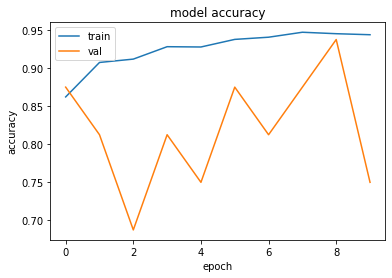

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()